In [0]:
from tensorflow.python import keras

In [0]:
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
from keras.layers import Convolution2D

In [0]:
from keras.layers import MaxPooling2D

In [0]:
from keras.layers import Flatten

In [0]:
from keras.layers import Dense

In [0]:
from keras.preprocessing.image import ImageDataGenerator


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
train_datagen= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True)
test_datagen= ImageDataGenerator(
    rescale=1./255)
train_set= train_datagen.flow_from_directory(
    '/content/gdrive/My Drive/colab/walk-or-run/train',
     target_size=(200,200),
     batch_size=50,
     class_mode="binary")
test_set= train_datagen.flow_from_directory(
     '/content/gdrive/My Drive/colab/walk-or-run/test',
     target_size=(200,200),
     batch_size=50,
     class_mode="binary")

Found 600 images belonging to 2 classes.
Found 141 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(80, (3, 3), input_shape=(100, 100,..., activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.


In [0]:
classifier= Sequential()
classifier.add(Convolution2D(128, 3,3, input_shape=(200,200,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(64, 3,3,activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=100, activation='relu'))
classifier.add(Dense(units=20, activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), input_shape=(200, 200,..., activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.


In [0]:
mod =classifier.fit_generator(
        train_set,
        steps_per_epoch=600,
        epochs=5,
        validation_data=test_set,
        validation_steps=141)

Epoch 1/5
600/600 [==============================] - 312s 520ms/step - loss: 0.6637 - acc: 0.5742 - val_loss: 0.6122 - val_acc: 0.6487
Epoch 2/5
600/600 [==============================] - 200s 333ms/step - loss: 0.5196 - acc: 0.7404 - val_loss: 0.6820 - val_acc: 0.6442
Epoch 3/5
600/600 [==============================] - 206s 343ms/step - loss: 0.3768 - acc: 0.8272 - val_loss: 0.8129 - val_acc: 0.6516
Epoch 4/5
600/600 [==============================] - 203s 338ms/step - loss: 0.2648 - acc: 0.8902 - val_loss: 0.9587 - val_acc: 0.6484
Epoch 5/5
600/600 [==============================] - 207s 345ms/step - loss: 0.2028 - acc: 0.9210 - val_loss: 1.1771 - val_acc: 0.6167


In [0]:
import matplotlib.pyplot as plt


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


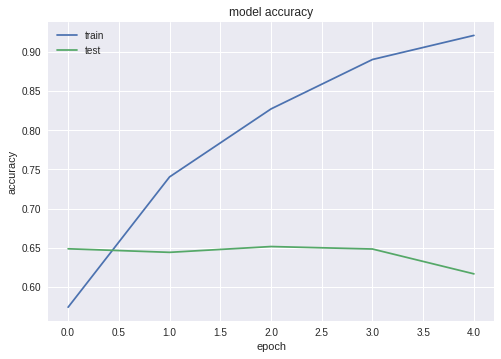

In [0]:
print(mod.history.keys())
plt.plot(mod.history['acc'])
plt.plot(mod.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
mod2 =classifier.fit_generator(
        train_set,
        steps_per_epoch=600,
        epochs=3,
        validation_data=test_set,
        validation_steps=141)

Epoch 1/3
600/600 [==============================] - 285s 475ms/step - loss: 0.4018 - acc: 0.8001 - val_loss: 1.0035 - val_acc: 0.7002
Epoch 2/3
600/600 [==============================] - 282s 470ms/step - loss: 0.0992 - acc: 0.9652 - val_loss: 1.7917 - val_acc: 0.6818
Epoch 3/3
600/600 [==============================] - 286s 477ms/step - loss: 0.0396 - acc: 0.9885 - val_loss: 1.8691 - val_acc: 0.6926


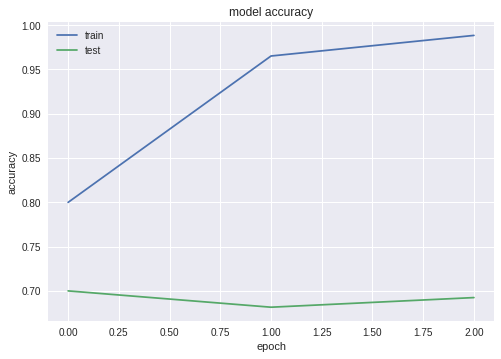

In [0]:

plt.plot(mod2.history['acc'])
plt.plot(mod2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
mod3 =classifier.fit_generator(
        train_set,
        steps_per_epoch=600,
        epochs=3,
        validation_data=test_set,
        validation_steps=141)

Epoch 1/3
600/600 [==============================] - 576s 961ms/step - loss: 0.4175 - acc: 0.7916 - val_loss: 1.1724 - val_acc: 0.6724
Epoch 2/3
600/600 [==============================] - 561s 935ms/step - loss: 0.0770 - acc: 0.9725 - val_loss: 1.4898 - val_acc: 0.6881
Epoch 3/3
600/600 [==============================] - 567s 944ms/step - loss: 0.0418 - acc: 0.9885 - val_loss: 1.7734 - val_acc: 0.6769


In [0]:
import numpy as np
from keras.preprocessing import image
test_image1= image.load_img('/content/gdrive/My Drive/colab/walk-or-run/test/run/run_3d46b336.png',target_size=(200,200))
test_image=image.img_to_array(test_image1)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image)

In [0]:
result

array([[0.]], dtype=float32)

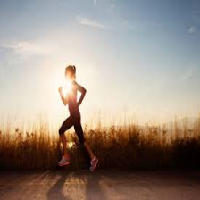

In [0]:
test_image1

In [0]:
train_set.class_indices

{'run': 0, 'walk': 1}

In [0]:
if result[0][0] == 1:
          prediction='walk'
else:prediction='run'

In [0]:
prediction


'run'

In [0]:
test_image2= image.load_img('/content/gdrive/My Drive/colab/walk-or-run/test/walk/walk_3fb09ff7.png',target_size=(200,200))
test_image=image.img_to_array(test_image2)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image)

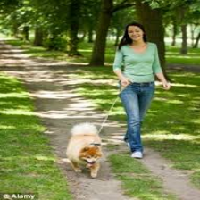

In [0]:
test_image2

In [0]:
prediction  ## incorrect classification lets try one more

'run'

In [0]:
test_image3= image.load_img('/content/gdrive/My Drive/colab/walk-or-run/test/walk/walk_9e646bbc.png',target_size=(200,200))
test_image=image.img_to_array(test_image3)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image)

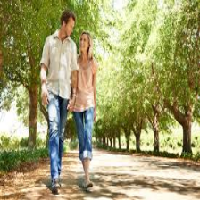

In [0]:
test_image3

In [0]:
prediction ## another incorrect prediction

'run'

array([[0.]], dtype=float32)

In [0]:

test_image4= image.load_img('/content/gdrive/My Drive/colab/walk-or-run/test/walk/walk_9d193f21.png',target_size=(200,200))
test_image=image.img_to_array(test_image4)
test_image=np.expand_dims(test_image,axis=0)
result1=classifier.predict(test_image)

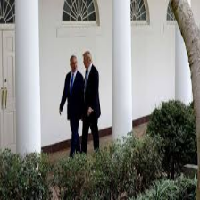

In [0]:
test_image4

In [0]:
prediction ## turns out our predictions for walk are completely off. Because of bad data

'run'

In [0]:

test_image6= image.load_img('/content/gdrive/My Drive/colab/walk-or-run/train/walk/walk_4ecc979c.png',target_size=(200,200))
test_image6=image.img_to_array(test_image6)
test_image6=np.expand_dims(test_image6,axis=0)
result6=classifier.predict(test_image)

In [0]:
result5

array([[0.]], dtype=float32)